<a href="https://colab.research.google.com/github/Kim-Yeonjoo/DeepLearning/blob/main/2_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0%EC%9D%98_%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# and w1 * x1 + w2 * x2 = y
```
1 1 = 1    0.5 * 1 + 0.5 * 1 > 0.7 = 1.2  
0 0 = 0    0.5 * 0 + 0.5 * 0 > 0.7 = 0.7 > 0  
0 1 = 0  
1 0 = 0  
```

In [1]:
# 퍼셉트론 구조 (일반 연산)
def AND(x1, x2) :
  w1 ,w2 , theta = 0.5, 0.5, 0.7  # 가중치
  tmp = x1*w1 + x2*w2
  if tmp <= theta :
    return 0
  elif tmp > theta :
    return 1

In [2]:
AND(0,0)

0

In [3]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [4]:
def OR(x1, x2) :
  w1 ,w2 , theta = 0.5, 0.5, 0.2  # 가중치
  tmp = x1*w1 + x2*w2
  if tmp <= theta :
    return 0
  elif tmp > theta :
    return 1

In [5]:
print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


In [20]:
def NAND(x1, x2) :
  w1 ,w2 , theta = -0.5, -0.5, -0.7  # 가중치
  tmp = x1*w1 + x2*w2
  if tmp <= theta :
    return 0
  elif tmp > theta :
    return 1

In [21]:
print(NAND(0,0))
print(NAND(1,0))
print(NAND(0,1))
print(NAND(1,1))

1
1
1
0


# 뉴런으로 정의한 논리 게이트

In [11]:
# 백터 버전
import numpy as np

def AND(x1, x2):
  x = np.array([x1 ,x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(x*w) + b

  if tmp <= 0 :
    return 0
  else :
    return 1

In [12]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [14]:
def OR(x1, x2):
  x = np.array([x1 ,x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(x*w) + b

  if tmp <= 0 :
    return 0
  else :
    return 1

In [15]:
print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


In [18]:
def NAND(x1, x2):
  x = np.array([x1 ,x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(x*w) + b

  if tmp <= 0 :
    return 0
  else :
    return 1

In [19]:
print(NAND(0,0))
print(NAND(1,0))
print(NAND(0,1))
print(NAND(1,1))

1
1
1
0


# 다층 퍼셉트론 Multi Layer Perceptron
```
x1 x2  nand  or and  = y  
0  0    1    0   0     0  
1  0    1    1   1     1  
0  1    1    1   1     1  
1  1    0    0   0     0  
```

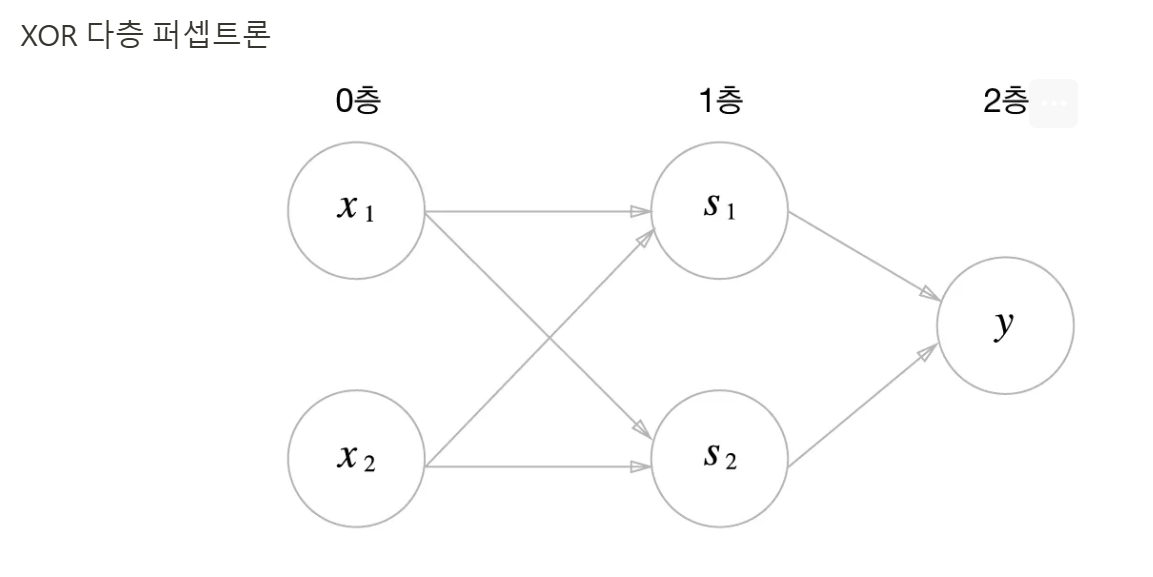

In [25]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)

  y = AND(s1, s2)

  return y

In [26]:
print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


1. 퍼셉트론은 입력과 출력이 있는 알고리즘
  > 입력을 정해진 규칙에 따라 계산해서 출력
2. 퍼셉트론은 '가중치'와 '편향(바이어스)'를 이용해서 매개변수로 설정
3. 퍼셉트론 하나로 AND, OR 같은 논리 게이트를 구성할 수 있다
  > 선형
4. XOR 같은 복합 논리는 퍼셉트론을 연결새 처리
  > 비선형
5. XOR는 2단 퍼셉트론을 구성할 수 있음

# MNIST 데이터셋으로 신경망 구성

In [27]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
len(train_labels)

60000

In [30]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

# 층2개 쌓기
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [32]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [33]:
# 2차원 텐서로 변경
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [34]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8758 - loss: 0.4325
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9662 - loss: 0.1141
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9787 - loss: 0.0737
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9843 - loss: 0.0510
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9896 - loss: 0.0358


In [35]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([1.2680124e-07, 5.0099231e-09, 1.8512312e-06, 2.3542468e-04,
       5.7270088e-11, 8.8030475e-08, 9.3904398e-12, 9.9976134e-01,
       2.9016789e-07, 7.4362924e-07], dtype=float32)

In [36]:
predictions[0].argmax()

7

In [37]:
test_labels[0]

7

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9770 - loss: 0.0707


(0.06234497204422951, 0.9797999858856201)